# Using Alphavantage 
Alpha Vantage provides realtime and historical financial market data through a set of powerful 
and developer-friendly data APIs



In [ ]:
#  %pip install alpha_vantage   # comment after installing alpha_van

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1. Importing libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange

In [16]:
#  Claim your free API key from https://alphavantage.co
# 
mykey = 'ZT5AY7RGJ5GZYJP3'

### 2. Get Real-Time Currency Exchange Rates



In [18]:
fx = ForeignExchange(mykey)
# Get EUR/USD exchange rate
data1= fx.get_currency_exchange_rate(from_currency="EUR", to_currency="USD")
print(data1)

({'1. From_Currency Code': 'EUR', '2. From_Currency Name': 'Euro', '3. To_Currency Code': 'USD', '4. To_Currency Name': 'United States Dollar', '5. Exchange Rate': '1.08310000', '6. Last Refreshed': '2025-03-30 12:07:00', '7. Time Zone': 'UTC', '8. Bid Price': '1.08305000', '9. Ask Price': '1.08314000'}, None)


In [19]:
data1= fx.get_currency_exchange_rate(from_currency="BTC", to_currency="USD")
print(data1)

({'1. From_Currency Code': 'BTC', '2. From_Currency Name': 'Bitcoin', '3. To_Currency Code': 'USD', '4. To_Currency Name': 'United States Dollar', '5. Exchange Rate': '83076.88000000', '6. Last Refreshed': '2025-03-30 12:08:03', '7. Time Zone': 'UTC', '8. Bid Price': '83075.67900000', '9. Ask Price': '83080.95900000'}, None)


### 3. Get Intraday Stock Prices (Real-Time)

In [22]:
ts = TimeSeries(mykey, output_format='pandas')

data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full') # Get real-time intraday stock data (1-minute intervals

In [23]:
type(ts)

alpha_vantage.timeseries.TimeSeries

In [24]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2025-03-28 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20895 entries, 2025-03-28 19:59:00 to 2025-02-27 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20895 non-null  float64
 1   2. high    20895 non-null  float64
 2   3. low     20895 non-null  float64
 3   4. close   20895 non-null  float64
 4   5. volume  20895 non-null  float64
dtypes: float64(5)
memory usage: 979.5 KB


In [26]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-28 19:59:00,260.275,260.30,260.020,260.12,14795.0
2025-03-28 19:58:00,260.278,260.33,260.200,260.27,12209.0
2025-03-28 19:57:00,260.130,260.27,260.120,260.25,8837.0
2025-03-28 19:56:00,260.070,260.19,260.070,260.15,5330.0
2025-03-28 19:55:00,260.100,260.18,260.045,260.11,10271.0


In [27]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-02-27 04:04:00,292.74,293.27,292.43,292.78,15709.0
2025-02-27 04:03:00,293.18,293.46,292.59,292.80,27881.0
2025-02-27 04:02:00,291.99,293.27,291.84,293.18,22352.0
2025-02-27 04:01:00,291.59,291.99,291.19,291.99,10893.0
2025-02-27 04:00:00,290.78,291.65,289.22,291.58,31988.0


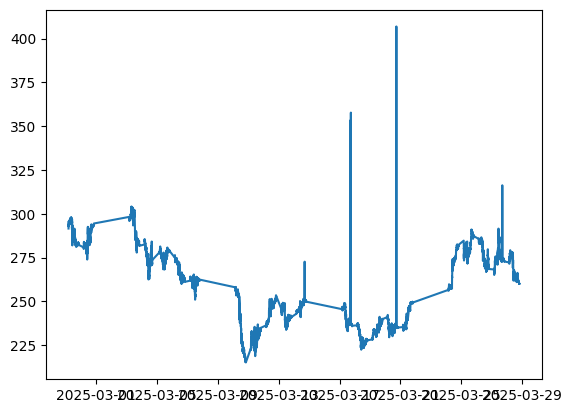

In [28]:
plt.plot(data['4. close'])

### 5. Rename Columns and Add Separate Date and Time Columns

In [11]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [13]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [14]:
data.loc['2020-12-31']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2020-12-31 20:00:00,704.69,704.70,704.50,704.50,2435.0,2020-12-31,20:00:00
2020-12-31 19:59:00,704.50,704.70,704.50,704.70,5691.0,2020-12-31,19:59:00
2020-12-31 19:58:00,704.48,704.50,704.48,704.50,2642.0,2020-12-31,19:58:00
2020-12-31 19:57:00,704.40,704.47,704.40,704.40,1453.0,2020-12-31,19:57:00
2020-12-31 19:54:00,704.35,704.47,704.35,704.35,2701.0,2020-12-31,19:54:00
...,...,...,...,...,...,...,...
2020-12-31 04:07:00,692.00,692.00,692.00,692.00,718.0,2020-12-31,04:07:00
2020-12-31 04:06:00,692.70,692.70,692.70,692.70,444.0,2020-12-31,04:06:00
2020-12-31 04:04:00,693.62,693.62,693.20,693.20,2586.0,2020-12-31,04:04:00


In [15]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3128 entries, 2020-12-28 09:30:00 to 2021-01-07 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3128 non-null   float64
 1   high       3128 non-null   float64
 2   low        3128 non-null   float64
 3   close      3128 non-null   float64
 4   volume     3128 non-null   float64
 5   TradeDate  3128 non-null   object 
 6   time       3128 non-null   object 
dtypes: float64(5), object(2)
memory usage: 195.5+ KB


In [16]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2020-12-28,660.8000,681.4000
2020-12-29,655.0000,669.9000
2020-12-30,668.3603,696.6000
2020-12-31,691.1200,718.7200
2021-01-04,717.1895,744.4899
2021-01-05,719.2000,740.8400
2021-01-06,749.1000,774.0000
2021-01-07,775.2000,816.9900


In [17]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2020-12-28 10:49:00,661.025,663.8800,660.8000,663.8800,169251.0,2020-12-28,10:49:00
2020-12-29 10:15:00,657.000,658.5800,655.0000,656.0600,162237.0,2020-12-29,10:15:00
2020-12-30 09:41:00,669.685,671.6300,668.3603,671.3301,141286.0,2020-12-30,09:41:00
2020-12-31 09:57:00,692.670,693.1200,691.1200,691.7961,175834.0,2020-12-31,09:57:00
2021-01-04 09:31:00,719.460,721.4900,717.1895,717.6900,871163.0,2021-01-04,09:31:00
2021-01-05 09:34:00,720.530,722.9109,719.2000,719.9714,209148.0,2021-01-05,09:34:00
2021-01-06 10:01:00,751.520,752.2772,749.1000,751.4219,349451.0,2021-01-06,10:01:00
2021-01-07 09:32:00,776.660,777.7000,775.2000,776.2500,236797.0,2021-01-07,09:32:00


In [18]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2020-12-28 09:43:00,679.8350,681.4000,678.0000,678.8728,416362.0,2020-12-28,09:43:00
2020-12-29 09:49:00,668.8599,669.9000,667.2000,667.7950,154742.0,2020-12-29,09:49:00
2020-12-30 14:44:00,695.6699,696.6000,695.5801,696.1716,166469.0,2020-12-30,14:44:00
2020-12-31 11:38:00,717.5985,718.7200,717.4100,718.4900,239463.0,2020-12-31,11:38:00
2021-01-04 10:33:00,741.7239,744.4899,741.6500,743.8500,295133.0,2021-01-04,10:33:00
2021-01-05 11:34:00,739.5500,740.8400,739.2000,740.3900,107022.0,2021-01-05,11:34:00
2021-01-06 14:07:00,772.7913,774.0000,772.6700,773.7541,130661.0,2021-01-06,14:07:00
2021-01-07 15:55:00,816.4611,816.9900,815.4400,815.9050,240217.0,2021-01-07,15:55:00
